<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Capstone Project <br> Heart Attack
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Heart Attack data)

The dataset contains information about several health and economic factors that contribute to Heart attack <br> Attribute information: 

**Patient_ID:** Unique ID of different patients.

**Gender:** Gender of the patient.

**Age:** Age of the patient.

**HyperTension:** A person got HyperTension or not

**Heart_Disease:** A person got affected with Heart_Disease

**Is_Married:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Employment_Type:** Determines whether the patient is a working professional in a Private/Govt sectors, never worked or children.

**Residential_type:** Specifies whether the patient is from Urban/Rural areas.

**Glucose_Levels:** Average glucose levels of a patient.

**BMI_Values:** Considering height and weight of a patient.

**Smoking_Habits:** Classifies whether the patient is a regular smoker, past smoker ornever smoked.

**Heart_Attack:** Chances of getting heart attack (Dependent Variable)



In [89]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE

In [156]:
plt.rcParams['figure.figsize'] = [15,8]

In [90]:
df=pd.read_csv('Heart_attack.csv')
df.head()

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [92]:
df[['Age','Glucose_Levels','BMI_Values']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
Glucose_Levels,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
BMI_Values,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        43400 non-null  int64  
 1   Gender            43400 non-null  object 
 2   Age               43400 non-null  float64
 3   HyperTension      43400 non-null  int64  
 4   Heart_Disease     43400 non-null  int64  
 5   Is_Married        43400 non-null  object 
 6   Employment_Type   43400 non-null  object 
 7   Residential_type  43400 non-null  object 
 8   Glucose_Levels    43400 non-null  float64
 9   BMI_Values        41938 non-null  float64
 10  Smoking_Habits    30108 non-null  object 
 11  Heart_Attack      43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [94]:
df.isnull().sum()

Patient_ID              0
Gender                  0
Age                     0
HyperTension            0
Heart_Disease           0
Is_Married              0
Employment_Type         0
Residential_type        0
Glucose_Levels          0
BMI_Values           1462
Smoking_Habits      13292
Heart_Attack            0
dtype: int64

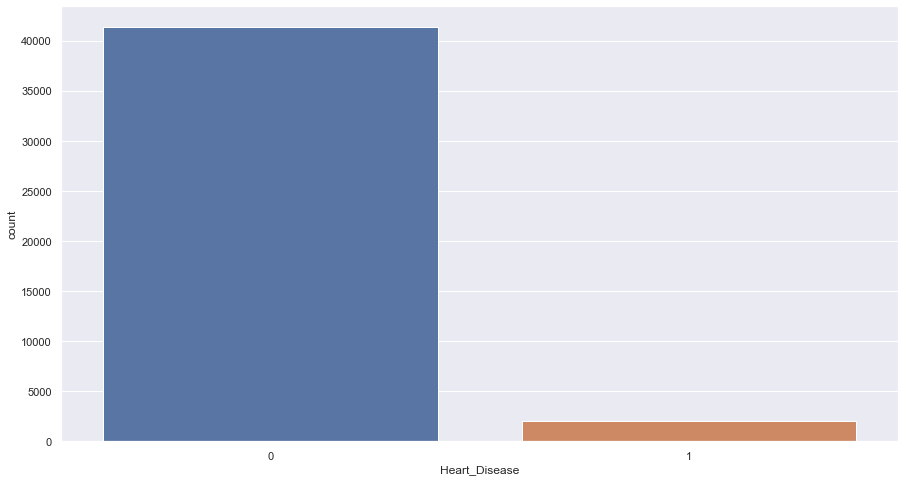

In [95]:
sns.countplot(df['Heart_Disease'])
sns.set(style="darkgrid")

In [96]:
df.apply(lambda x : len(x.unique()))

Patient_ID          43400
Gender                  3
Age                   104
HyperTension            2
Heart_Disease           2
Is_Married              2
Employment_Type         5
Residential_type        2
Glucose_Levels      12543
BMI_Values            556
Smoking_Habits          4
Heart_Attack            2
dtype: int64

<AxesSubplot:>

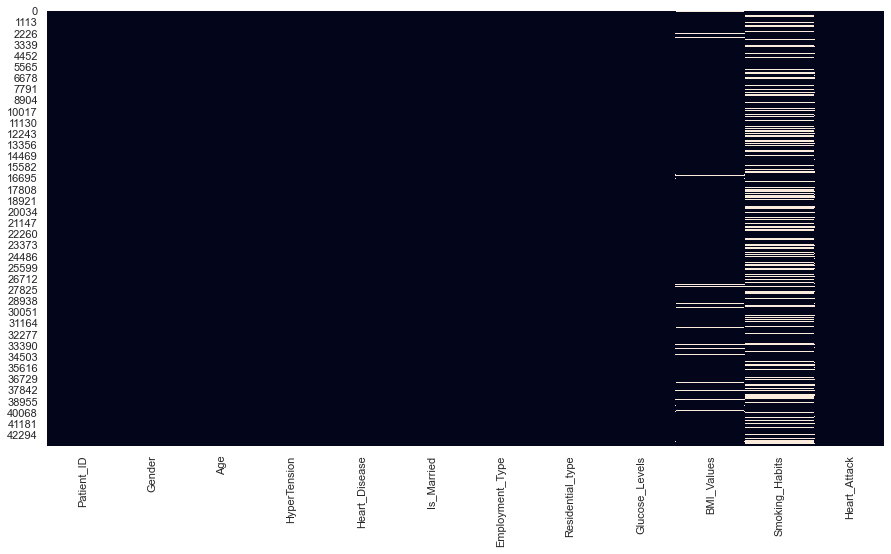

In [97]:
sns.heatmap(df.isnull(), cbar=False)

In [98]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,Gender,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,No,children,Rural,NaN
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,NaN
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,NaN


In [99]:
cat_df.isnull().sum()

Gender                  0
Is_Married              0
Employment_Type         0
Residential_type        0
Smoking_Habits      13292
dtype: int64

In [100]:
df.columns

Index(['Patient_ID', 'Gender', 'Age', 'HyperTension', 'Heart_Disease',
       'Is_Married', 'Employment_Type', 'Residential_type', 'Glucose_Levels',
       'BMI_Values', 'Smoking_Habits', 'Heart_Attack'],
      dtype='object')

In [102]:
df['BMI_Values'].skew()

0.8987282500249906

In [103]:
a=df['BMI_Values'].median()
df['BMI_Values']=df['BMI_Values'].fillna(a)

In [104]:
df.isnull().sum()

Patient_ID              0
Gender                  0
Age                     0
HyperTension            0
Heart_Disease           0
Is_Married              0
Employment_Type         0
Residential_type        0
Glucose_Levels          0
BMI_Values              0
Smoking_Habits      13292
Heart_Attack            0
dtype: int64

In [105]:
df['Smoking_Habits']=df['Smoking_Habits'].fillna('never smoked')

In [106]:
df.isnull().sum()

Patient_ID          0
Gender              0
Age                 0
HyperTension        0
Heart_Disease       0
Is_Married          0
Employment_Type     0
Residential_type    0
Glucose_Levels      0
BMI_Values          0
Smoking_Habits      0
Heart_Attack        0
dtype: int64

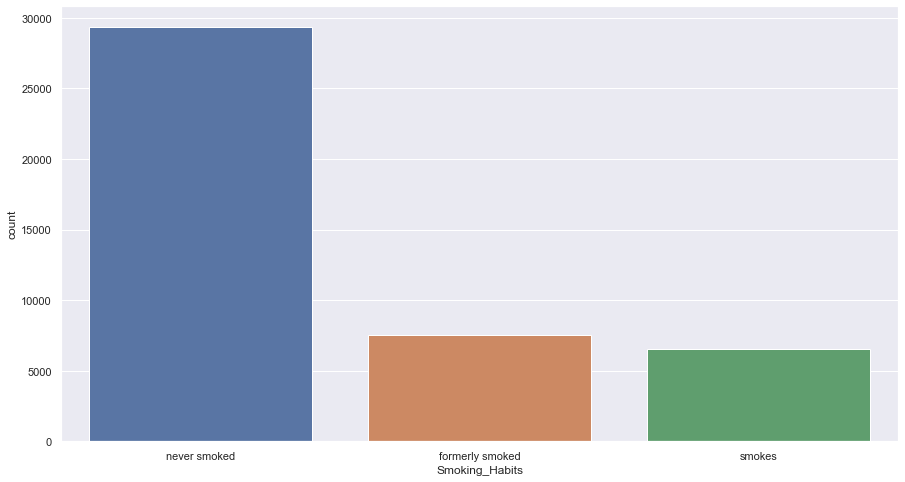

In [107]:
sns.countplot(df['Smoking_Habits'])
plt.xlabel='Smoking Habits'
plt.ylabel='Counts'
plt.show()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: Employment_Type, dtype: int64


<AxesSubplot:title={'center':'Employment Status'}>

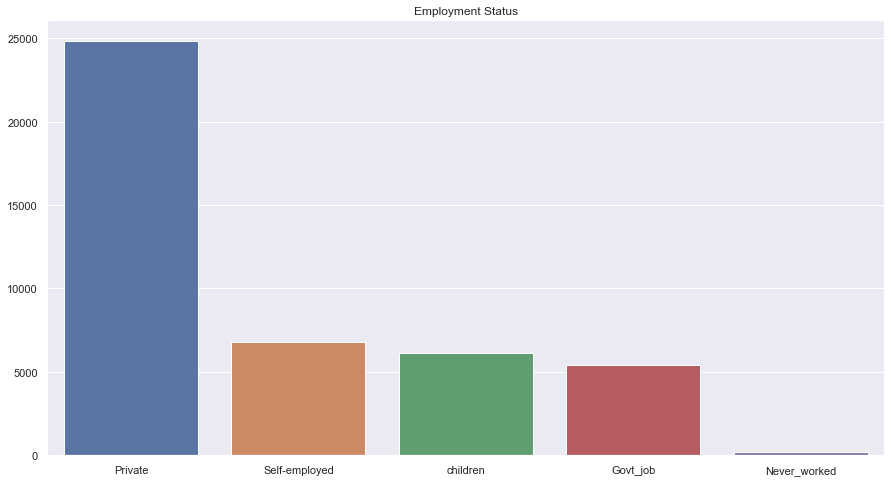

In [108]:
sh3=df['Employment_Type'].value_counts()
print(sh3)
plt.title("Employment Status")
sns.set(style='darkgrid')
sns.barplot(sh3.index,sh3.values)

In [109]:
df['BMI_Values'].skew()

0.9255483805080513

In [110]:
np.log(df['BMI_Values']).skew()

-0.02338429324618423

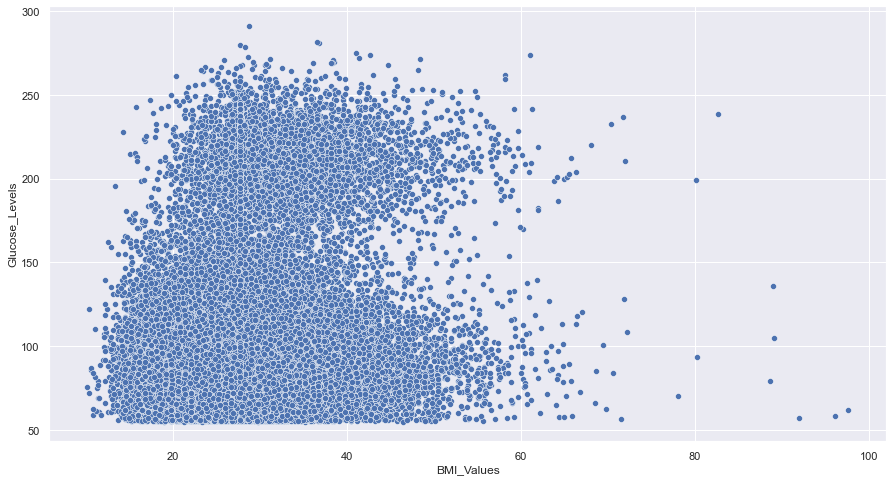

In [111]:
sns.scatterplot('BMI_Values', 'Glucose_Levels', data = df);

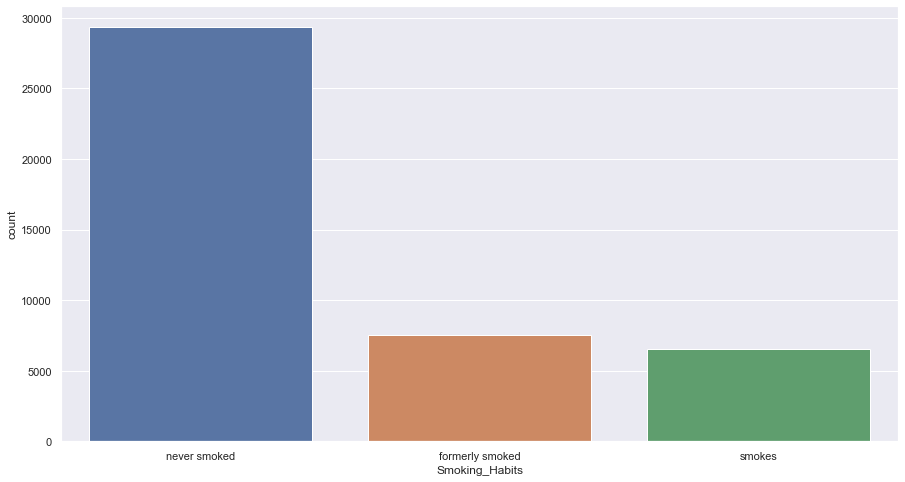

In [112]:
sns.countplot(df['Smoking_Habits'])
sns.set(style='darkgrid')
plt.xlabel='Smoking Habits'
plt.ylabel='Counts'
plt.show()

<AxesSubplot:xlabel='Heart_Attack', ylabel='Age'>

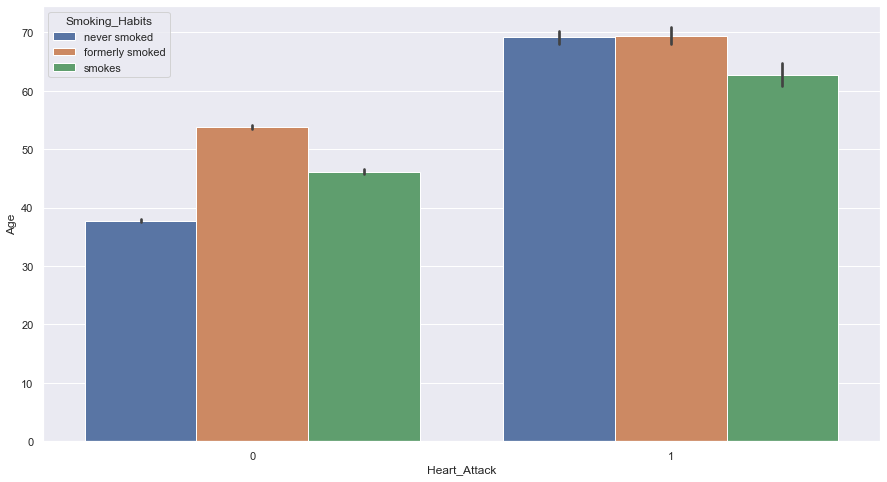

In [155]:
sns.barplot(df.Heart_Attack,df.Age,hue=df.Smoking_Habits,data=df)

## Removing Outliers

In [113]:
df1=df.copy()

In [114]:
df1.head()

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [115]:
df1[['HyperTension','Heart_Disease']] = df1[['HyperTension','Heart_Disease']].astype('object')#@
df1.dtypes

Patient_ID            int64
Gender               object
Age                 float64
HyperTension         object
Heart_Disease        object
Is_Married           object
Employment_Type      object
Residential_type     object
Glucose_Levels      float64
BMI_Values          float64
Smoking_Habits       object
Heart_Attack          int64
dtype: object

In [116]:
df1.shape

(43400, 12)

In [117]:
df1['Heart_Attack'].value_counts()

0    42617
1      783
Name: Heart_Attack, dtype: int64

In [118]:
df1=df1.reset_index(drop=True)

In [119]:
df1.shape

(43400, 12)

In [120]:
df1['Heart_Attack'].value_counts()

0    42617
1      783
Name: Heart_Attack, dtype: int64

<AxesSubplot:xlabel='BMI_Values'>

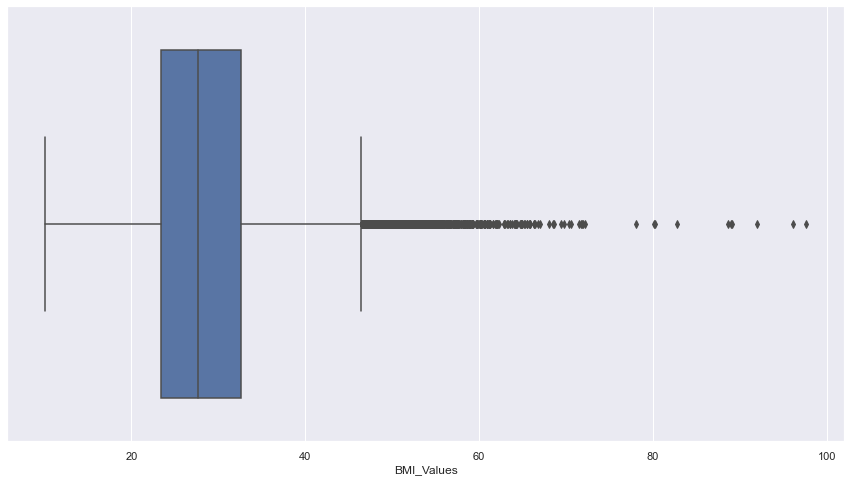

In [121]:
#df1['BMI_Values'].plot(kind='box')
sns.boxplot(df1['BMI_Values'])

In [122]:
df1['Glucose_Levels'].skew()

1.6754049014377763

<AxesSubplot:xlabel='Glucose_Levels'>

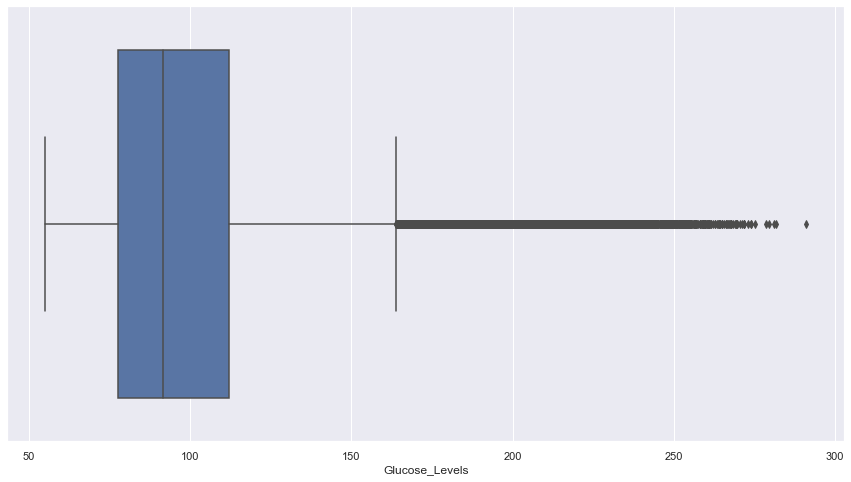

In [123]:
sns.boxplot(df1['Glucose_Levels'])

In [124]:
#df1=df1.reset_index(drop=True)

In [125]:
#7  indep cate var of object d type must be there.in that hyp and hd ka d type must be changed from int to obj.@df_Cat

In [126]:
df1_cat = df1[['Gender','HyperTension','Heart_Disease','Is_Married','Employment_Type','Residential_type','Smoking_Habits']]
df1_cat.head()#all are pure cate var with o,1 or str values.

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,0,0,No,children,Rural,never smoked
1,Male,1,0,Yes,Private,Urban,never smoked
2,Female,0,0,No,Private,Urban,never smoked
3,Female,0,0,Yes,Private,Rural,formerly smoked
4,Male,0,0,No,Never_worked,Rural,never smoked


In [127]:
df1_cat.shape

(43400, 7)

In [128]:
#df1_cat..earlier it had 7 cate var.now it has 12 encoded col related to 7 cate var.

In [129]:
df1_cat= pd.get_dummies(df1_cat,drop_first = True)
df1_cat.head()#df1_cat has dummy var of all cate var(including hyp and hdisease) .df1 and df same both have dep var too

,Gender_Male,Gender_Other,HyperTension_1,Heart_Disease_1,Is_Married_Yes,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Urban,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,1,0,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,1,0,1,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,1,0


In [130]:
df1_cat.shape

(43400, 12)

In [131]:
num_df1 = df1.drop(['Patient_ID','Heart_Attack','HyperTension','Heart_Disease'],axis=1)
num_df1 = num_df1.select_dtypes(include=['int64','float64']).copy()
num_df1.head()#num_df1 this df has 3  numerical colms.

,Age,Glucose_Levels,BMI_Values
0,3.0,95.12,18.0
1,58.0,87.96,39.2
2,8.0,110.89,17.6
3,70.0,69.04,35.9
4,14.0,161.28,19.1


In [132]:
num_df1.shape

(43400, 3)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_df1 = pd.DataFrame(scaler.fit_transform(num_df1), columns = num_df1.columns)
num_df1#scaling of numerical var in num_df1 var and scaled values stored in same var
#num_df1 had num vars with original values.now it has scaled values of 3 num vars.

,Age,Glucose_Levels,BMI_Values
0,-1.741517,-0.217176,-1.384161
1,0.700823,-0.383258,1.390824
2,-1.519486,0.148621,-1.436520
3,1.233697,-0.822123,0.958869
4,-1.253049,1.317458,-1.240176
...,...,...,...
43395,-1.430674,-1.063359,-1.070012
43396,0.612011,2.531294,3.511331
43397,1.766571,-0.290939,0.042600
43398,-0.098488,-0.123465,0.605451


In [134]:
df_pre=pd.concat([num_df1,df1_cat],axis=1)
#df_pre.reset_index(inplace=True)#preprocessed df ready for modelling..no patient id and no dep var

In [135]:
df_pre

,Age,Glucose_Levels,BMI_Values,Gender_Male,Gender_Other,HyperTension_1,Heart_Disease_1,Is_Married_Yes,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Urban,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,-1.741517,-0.217176,-1.384161,1,0,0,0,0,0,0,0,1,0,1,0
1,0.700823,-0.383258,1.390824,1,0,1,0,1,0,1,0,0,1,1,0
2,-1.519486,0.148621,-1.436520,0,0,0,0,0,0,1,0,0,1,1,0
3,1.233697,-0.822123,0.958869,0,0,0,0,1,0,1,0,0,0,0,0
4,-1.253049,1.317458,-1.240176,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,-1.430674,-1.063359,-1.070012,0,0,0,0,0,0,0,0,1,1,1,0
43396,0.612011,2.531294,3.511331,0,0,0,0,1,0,0,0,0,1,0,0
43397,1.766571,-0.290939,0.042600,0,0,1,0,1,0,1,0,0,1,0,0
43398,-0.098488,-0.123465,0.605451,1,0,0,0,1,0,1,0,0,1,1,0


In [136]:
df_pre.dtypes

Age                              float64
Glucose_Levels                   float64
BMI_Values                       float64
Gender_Male                        uint8
Gender_Other                       uint8
HyperTension_1                     uint8
Heart_Disease_1                    uint8
Is_Married_Yes                     uint8
Employment_Type_Never_worked       uint8
Employment_Type_Private            uint8
Employment_Type_Self-employed      uint8
Employment_Type_children           uint8
Residential_type_Urban             uint8
Smoking_Habits_never smoked        uint8
Smoking_Habits_smokes              uint8
dtype: object

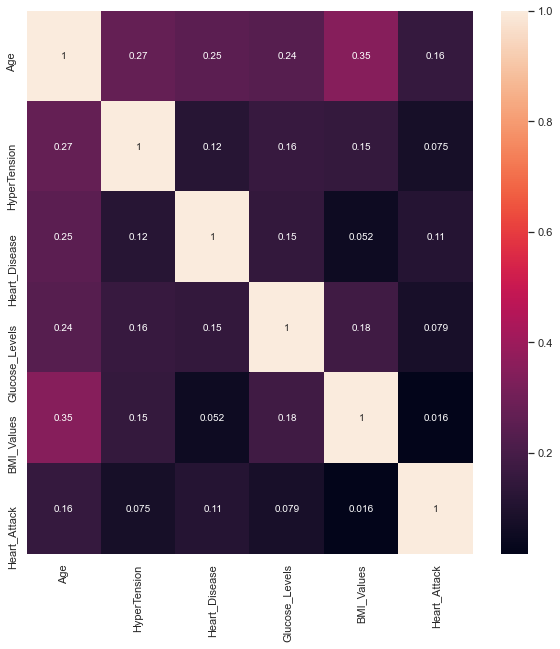

In [151]:
df_corr=df.drop('Patient_ID',axis=1)

plt.figure(figsize=(10,10))

sns.heatmap(df_corr.corr(),annot=True,annot_kws={'size':10})
plt.show()


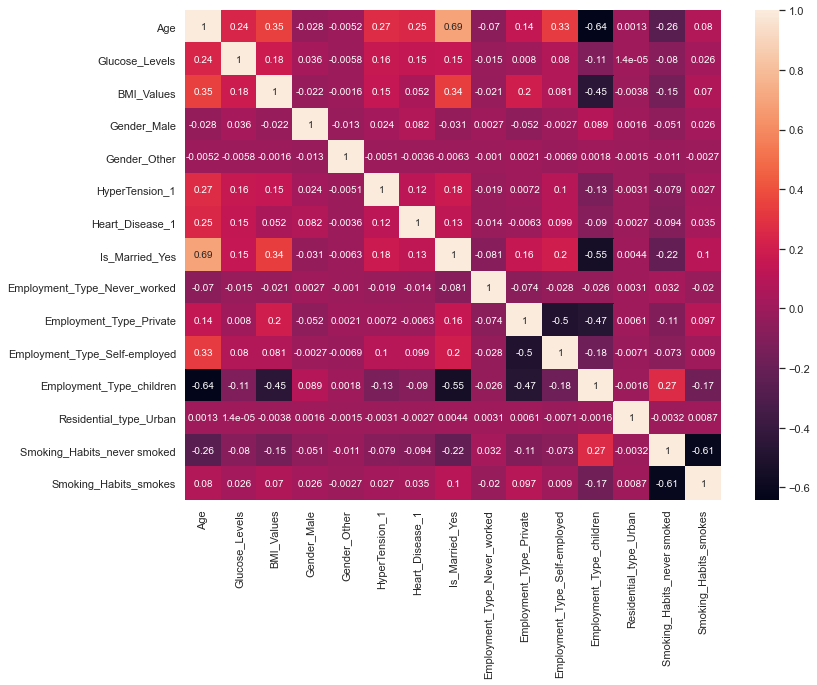

In [154]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pre.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [138]:
df_pre.columns

Index(['Age', 'Glucose_Levels', 'BMI_Values', 'Gender_Male', 'Gender_Other',
       'HyperTension_1', 'Heart_Disease_1', 'Is_Married_Yes',
       'Employment_Type_Never_worked', 'Employment_Type_Private',
       'Employment_Type_Self-employed', 'Employment_Type_children',
       'Residential_type_Urban', 'Smoking_Habits_never smoked',
       'Smoking_Habits_smokes'],
      dtype='object')

#Employment_Type_children and Age have  negative correlation of -0.64.
#Employment_Type_children and Is_Married_Yes have negative correlation of -0.55.
#Employment_Type_Self-employed and Employment_Type_Private have negative correlation of -0.5.

In [45]:
df1.dtypes

Patient_ID            int64
Gender               object
Age                 float64
HyperTension         object
Heart_Disease        object
Is_Married           object
Employment_Type      object
Residential_type     object
Glucose_Levels      float64
BMI_Values          float64
Smoking_Habits       object
Heart_Attack          int64
dtype: object

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_pre.values,i) for i in range(df_pre.shape[1])]
vif['Features']=df_pre.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
7,4.367647,Is_Married_Yes
13,3.947307,Smoking_Habits_never smoked
9,3.567576,Employment_Type_Private
0,2.867724,Age
11,2.747026,Employment_Type_children
12,1.908222,Residential_type_Urban
10,1.786683,Employment_Type_Self-employed
3,1.664269,Gender_Male
14,1.644888,Smoking_Habits_smokes
2,1.311468,BMI_Values


In [48]:
#No multi collinearity  present amongst  independent variables.

## Class Imbalance

In [49]:
df1['Heart_Attack'].value_counts(normalize=True)

0    0.981959
1    0.018041
Name: Heart_Attack, dtype: float64

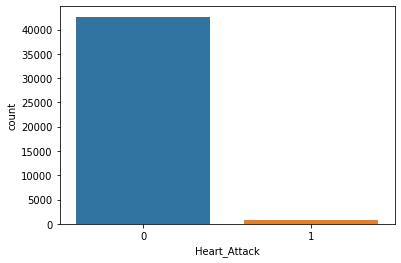

In [50]:
sns.countplot(df1['Heart_Attack'])
plt.show()

In [51]:
x=df_pre
y=df1['Heart_Attack']

In [52]:
y.value_counts()

0    42617
1      783
Name: Heart_Attack, dtype: int64

In [53]:
x.columns

Index(['Age', 'Glucose_Levels', 'BMI_Values', 'Gender_Male', 'Gender_Other',
       'HyperTension_1', 'Heart_Disease_1', 'Is_Married_Yes',
       'Employment_Type_Never_worked', 'Employment_Type_Private',
       'Employment_Type_Self-employed', 'Employment_Type_children',
       'Residential_type_Urban', 'Smoking_Habits_never smoked',
       'Smoking_Habits_smokes'],
      dtype='object')

In [54]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

x_sm,y_sm=smote.fit_resample(x,y)

Using TensorFlow backend.


In [55]:
print('Before Smote independent variable shape',x.shape)
print('Before Smote target variable shape',y.shape)

Before Smote independent variable shape (43400, 15)
Before Smote target variable shape (43400,)


In [56]:
print('After Smote independent variable shape',x_sm.shape)
print('After Smote target variable shape',y_sm.shape)

After Smote independent variable shape (85234, 15)
After Smote target variable shape (85234,)


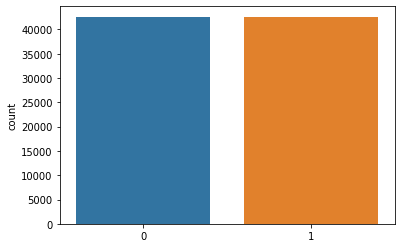

In [57]:
sns.countplot(y_sm)
plt.show()

In [58]:
x_sm=pd.DataFrame(x_sm,columns=x.columns)
x_sm.head()

,Age,Glucose_Levels,BMI_Values,Gender_Male,Gender_Other,HyperTension_1,Heart_Disease_1,Is_Married_Yes,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Urban,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,-1.741517,-0.217176,-1.384161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.700823,-0.383258,1.390824,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-1.519486,0.148621,-1.436520,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.233697,-0.822123,0.958869,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.253049,1.317458,-1.240176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
x_sm.shape

(85234, 15)

In [60]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [61]:
X = sm.add_constant(x_sm)

X_train, X_test, y_train, y_test = train_test_split(X, y_sm, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (68187, 16)
y_train (68187,)
X_test (17047, 16)
y_test (17047,)


#  Logistic Regression

In [62]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

         Current function value: 0.454994
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                68187
Model:                          Logit   Df Residuals:                    68171
Method:                           MLE   Df Model:                           15
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.3436
Time:                        22:03:02   Log-Likelihood:                -31025.
converged:                      False   LL-Null:                       -47264.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.0961      0.052    -40.555      0.000      -2.197      -1.995
Age     

In [63]:
y_pred_prob = logreg.predict(X_test)

y_pred_prob.head()

20969    0.292055
34562    0.628395
47820    0.609422
2159     0.112371
72514    0.869974
dtype: float64

In [64]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [65]:
y_pred[0:5]

[0, 1, 1, 0, 1]

#### Plot the confusion matrix.

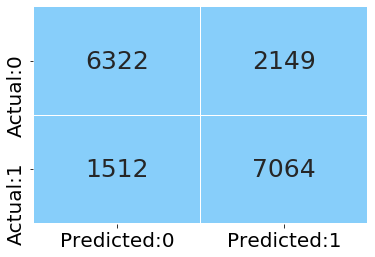

In [66]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [67]:
# performance measures
acc_table = classification_report(y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      8471
           1       0.77      0.82      0.79      8576

   micro avg       0.79      0.79      0.79     17047
   macro avg       0.79      0.79      0.78     17047
weighted avg       0.79      0.79      0.78     17047



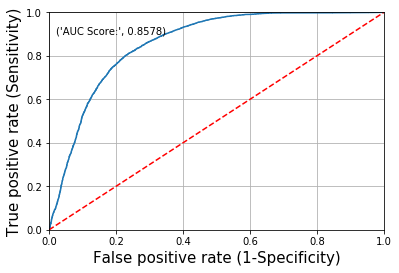

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)


## Identify the Best Cut-off Value


###  Cost-based Method

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (68187, 15)
y_train (68187,)
X_test (17047, 15)
y_test (17047,)


In [70]:
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    cm = confusion_matrix(actual_value, predicted_value)           
    
    cm_array = np.array(cm)
    
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

i = 0

for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 

    i += 1

In [71]:
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
20,0.30,8840.0
23,0.33,8848.0
21,0.31,8858.0
22,0.32,8866.0
24,0.34,8867.0
27,0.37,8871.5
25,0.35,8873.0
19,0.29,8875.0
18,0.28,8881.0
26,0.36,8890.5


In [72]:
df_total_cost['cut-off'].mean()

0.5449999999999999

In [73]:
y_pred_cost = [ 0 if x < 0.55 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

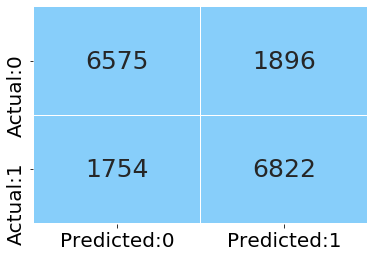

In [74]:
cm = confusion_matrix(y_test, y_pred_cost)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

**Compute various performance metrics.**

In [75]:
acc_table = classification_report(y_test, y_pred_cost)

print(acc_table)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      8471
           1       0.78      0.80      0.79      8576

   micro avg       0.79      0.79      0.79     17047
   macro avg       0.79      0.79      0.79     17047
weighted avg       0.79      0.79      0.79     17047



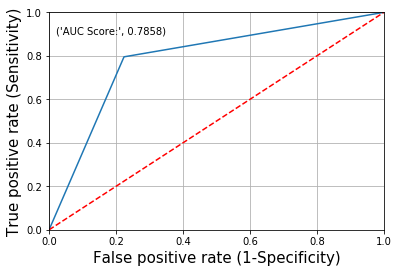

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cost)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_cost),4)))

plt.grid(True)


#  Recursive Feature Elimination (RFE)

In [77]:
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 5)

rfe_model = rfe_model.fit(X_train_rfe, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Gender_Other', 'Heart_Disease_1', 'Is_Married_Yes',
       'Employment_Type_Never_worked', 'Employment_Type_children'],
      dtype='object')


In [78]:
logreg_rfe = sm.Logit(y_train, X_train[signi_feat_rfe]).fit()

print(logreg_rfe.summary())

         Current function value: 0.612160
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                68187
Model:                          Logit   Df Residuals:                    68182
Method:                           MLE   Df Model:                            4
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.1168
Time:                        22:03:09   Log-Likelihood:                -41741.
converged:                      False   LL-Null:                       -47264.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Gender_Other                   -17.6194   2557.794     -0.007      0.995   -5030.803    4995.564
Heart_Disea

In [79]:
y_pred_prob_rfe = logreg_rfe.predict(X_test[signi_feat_rfe])

y_pred_prob_rfe.head()

20969    0.548049
34562    0.548049
47820    0.548049
2159     0.548049
72514    0.824912
dtype: float64

In [80]:
y_pred_rfe = [ 0 if x < 0.55 else 1 for x in y_pred_prob_rfe]

In [81]:
y_pred_rfe[0:5]

[0, 0, 0, 0, 1]

#### Plot the confusion matrix.

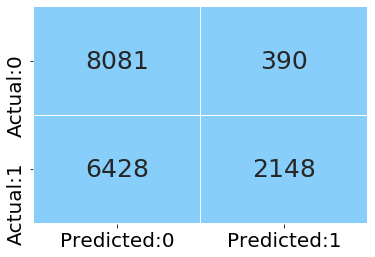

In [82]:
cm = confusion_matrix(y_test, y_pred_rfe)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

#### Compute the performance measures.

In [83]:
result = classification_report(y_test, y_pred_rfe)

print(result)

              precision    recall  f1-score   support

           0       0.56      0.95      0.70      8471
           1       0.85      0.25      0.39      8576

   micro avg       0.60      0.60      0.60     17047
   macro avg       0.70      0.60      0.54     17047
weighted avg       0.70      0.60      0.54     17047



#### Plot the ROC curve.

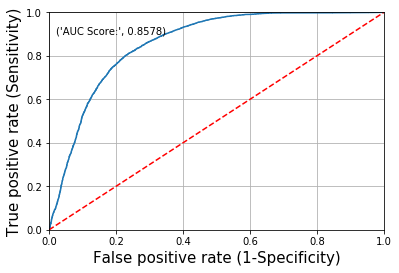

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

## Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [140]:
y_pred= classifier.predict(X_test)  

In [141]:
classifier.score(X_train,y_train)

1.0

In [142]:
classifier.score(X_test,y_test)

0.9707866486771866

In [143]:
result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8471
           1       0.97      0.98      0.97      8576

   micro avg       0.97      0.97      0.97     17047
   macro avg       0.97      0.97      0.97     17047
weighted avg       0.97      0.97      0.97     17047



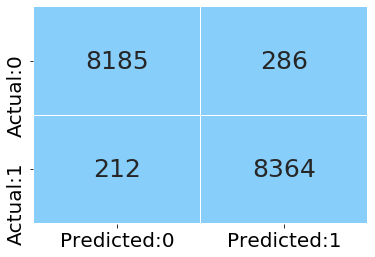

In [144]:
cm= confusion_matrix(y_test, y_pred)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

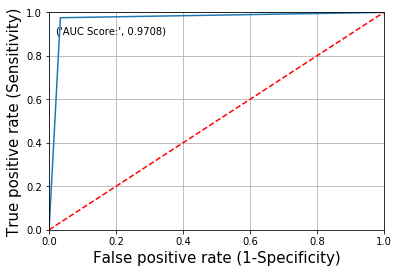

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

plt.grid(True)

In [159]:
df_dt=pd.DataFrame()

In [160]:
df_dt['Features']=x_sm.columns

In [161]:
df_dt['Importance']=classifier.feature_importances_

In [162]:
df_dt.sort_values('Importance',ascending=False)

,Features,Importance
0,Age,0.745182
1,Glucose_Levels,0.073980
2,BMI_Values,0.065475
12,Residential_type_Urban,0.017737
6,Heart_Disease_1,0.016258
13,Smoking_Habits_never smoked,0.014071
3,Gender_Male,0.013171
5,HyperTension_1,0.013058
9,Employment_Type_Private,0.010456
10,Employment_Type_Self-employed,0.010000


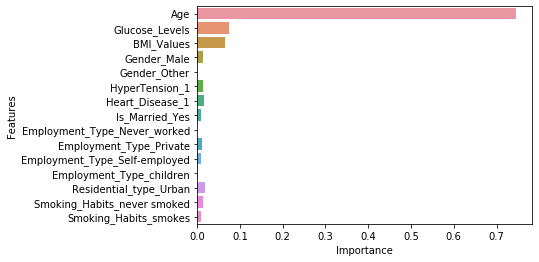

In [169]:
sns.barplot(df_dt['Importance'],df_dt['Features'],orient='h')

### Random Forest


In [146]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=50,random_state=1)


In [147]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [151]:
y_pred_rf=model.predict(X_test)
y_pred_rf

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [152]:
model.score(X_train,y_train)

0.9999560033437459

In [153]:
model.score(X_test,y_test)

0.97518624978002

In [154]:
result = classification_report(y_test, y_pred_rf)

print(result)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8471
           1       0.97      0.99      0.98      8576

   micro avg       0.98      0.98      0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047



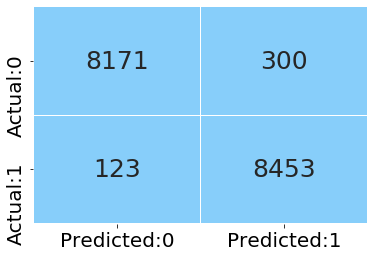

In [155]:
cm= confusion_matrix(y_test, y_pred_rf)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

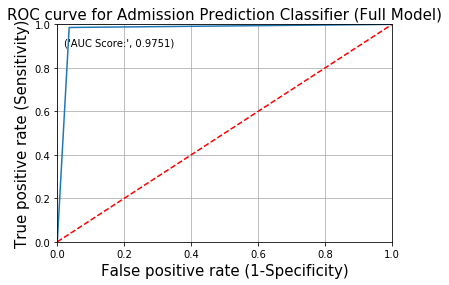

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_rf),4)))

plt.grid(True)

In [170]:
df_rf=pd.DataFrame()

In [171]:
df_rf['Features']=x_sm.columns

In [172]:
df_rf['Importance']=model.feature_importances_

In [173]:
df_rf.sort_values('Importance',ascending=False)

,Features,Importance
0,Age,0.380085
1,Glucose_Levels,0.154622
2,BMI_Values,0.146525
7,Is_Married_Yes,0.079948
6,Heart_Disease_1,0.036807
5,HyperTension_1,0.034888
3,Gender_Male,0.030054
12,Residential_type_Urban,0.030042
9,Employment_Type_Private,0.025338
13,Smoking_Habits_never smoked,0.025260


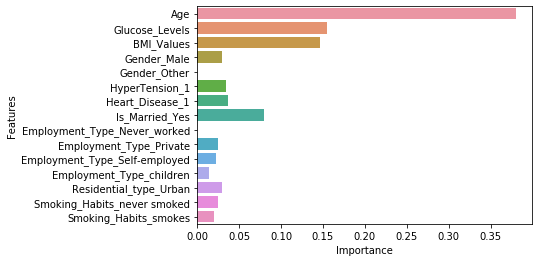

In [174]:
sns.barplot(df_rf['Importance'],df_rf['Features'],orient='h')

## RandomForestClassifier with GridSearch

In [100]:
param_grid ={
    'max_depth': [10, 20, 30, 40,50,60,70],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20, 40,60,80 ]
}

In [101]:
from sklearn.model_selection import GridSearchCV
RFclf = RandomForestClassifier(max_depth=10, n_estimators=20)
grid = GridSearchCV(estimator=RFclf, param_grid=param_grid, cv = 4, n_jobs=2,verbose=2)
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   56.7s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  5.2min
[Parallel(n_jobs=2)]: Done 224 out of 224 | elapsed:  7.5min finished


Best: 0.973617 using {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 60}


In [134]:
RF=grid_result.best_estimator_
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
Y_pred_RFclf=RF.predict(X_train)
score_RFclf = round(accuracy_score(Y_pred_RFclf,y_train)*100,2)
score_RFclf

100.0

In [136]:
Y_pred_RFclf=RF.predict(X_test)
score_RFclf = round(accuracy_score(Y_pred_RFclf,y_test)*100,2)
score_RFclf

97.58

In [157]:
result = classification_report(y_test, Y_pred_RFclf)

print(result)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8471
           1       0.97      0.99      0.98      8576

   micro avg       0.98      0.98      0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047



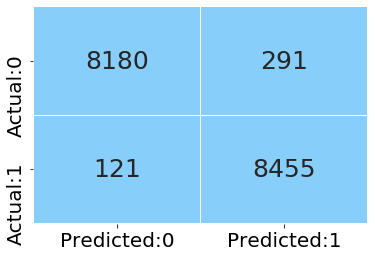

In [137]:
cm= confusion_matrix(y_test, Y_pred_RFclf)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

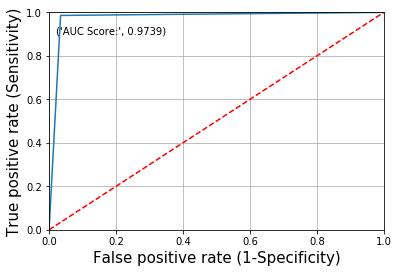

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_RFclf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

plt.grid(True)

In [175]:
df_gs=pd.DataFrame()

In [176]:
df_gs['Features']=x_sm.columns

In [177]:
df_gs['Importance']=RF.feature_importances_

In [178]:
df_gs.sort_values('Importance',ascending=False)

,Features,Importance
0,Age,0.368733
1,Glucose_Levels,0.155141
2,BMI_Values,0.149269
7,Is_Married_Yes,0.068627
6,Heart_Disease_1,0.042167
5,HyperTension_1,0.035453
12,Residential_type_Urban,0.032109
3,Gender_Male,0.029667
9,Employment_Type_Private,0.026889
10,Employment_Type_Self-employed,0.026844


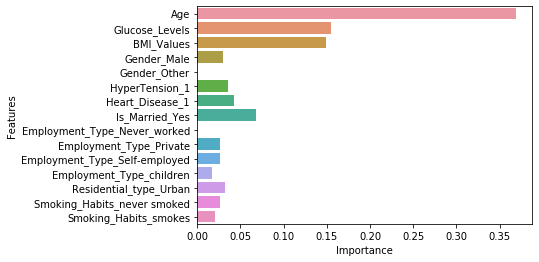

In [179]:
sns.barplot(df_gs['Importance'],df_gs['Features'],orient='h')

## RandomForestClassifier with GridSearch with more parameters

In [111]:
from sklearn.model_selection import GridSearchCV

param={'n_estimators':[10,30,50,70,90],
    'criterion':['gini','entropy'],
    'max_depth':[10,15,20],
    'min_samples_split':[2,5,8,12],
    'min_samples_leaf':[1,5,9],
    'max_features':['auto', 'sqrt'],
    }

rf_grid=GridSearchCV(estimator=model,param_grid=param,cv = 4, n_jobs=2,verbose=2)

rf_model_grid=rf_grid.fit(X_train,y_train)


Fitting 4 folds for each of 720 candidates, totalling 2880 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   50.2s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  8.3min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed: 15.5min
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed: 26.0min
[Parallel(n_jobs=2)]: Done 1454 tasks      | elapsed: 39.2min
[Parallel(n_jobs=2)]: Done 1981 tasks      | elapsed: 54.9min
[Parallel(n_jobs=2)]: Done 2588 tasks      | elapsed: 106.1min
[Parallel(n_jobs=2)]: Done 2880 out of 2880 | elapsed: 129.0min finished


In [112]:
rf_model_grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [113]:
model1=grid_result.best_estimator_
model1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
Y_pred_RFclf=model1.predict(X_train)
score_RFclf = round(accuracy_score(Y_pred_RFclf,y_train)*100,2)
score_RFclf

100.0

In [116]:
Y_pred_RFclf_test=model1.predict(X_test)
score_RFclf = round(accuracy_score(Y_pred_RFclf_test,y_test)*100,2)
score_RFclf

97.58

In [158]:
result = classification_report(y_test, Y_pred_RFclf_test)

print(result)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8471
           1       0.97      0.99      0.98      8576

   micro avg       0.98      0.98      0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047



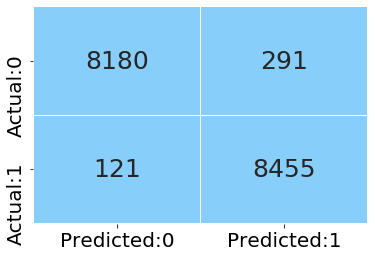

In [117]:
cm= confusion_matrix(y_test, Y_pred_RFclf_test)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()



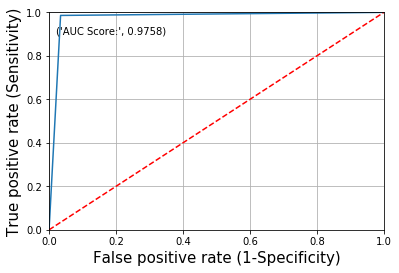

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_RFclf_test)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, Y_pred_RFclf_test),4)))

plt.grid(True)

In [180]:
df_rfgs=pd.DataFrame()

In [181]:
df_rfgs['Features']=x_sm.columns

In [182]:
df_rfgs['Importance']=model1.feature_importances_

In [183]:
df_rfgs.sort_values('Importance',ascending=False)

,Features,Importance
0,Age,0.368733
1,Glucose_Levels,0.155141
2,BMI_Values,0.149269
7,Is_Married_Yes,0.068627
6,Heart_Disease_1,0.042167
5,HyperTension_1,0.035453
12,Residential_type_Urban,0.032109
3,Gender_Male,0.029667
9,Employment_Type_Private,0.026889
10,Employment_Type_Self-employed,0.026844


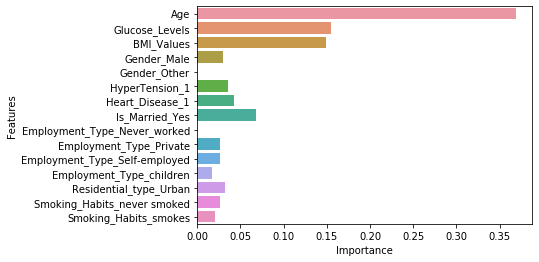

In [184]:
sns.barplot(df_rfgs['Importance'],df_rfgs['Features'],orient='h')

In [ ]:
## Accuracy increased when we used best parameters.

rf_new=RandomForestClassifier(criterion= 'gini',max_depth= 40,max_features= 'sqrt',n_estimators= 50,oob_score=True)

rf_new_model=rf_new.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score

score=cross_val_score(estimator=rf_new,X=X_train,y=y_train,cv=10,scoring='roc_auc')
score.mean()#accuracy increased whhen we used best parameters#rfc,model,xtest,ypred